In [2]:

from tueplots import axes, bundles
from bertopic import BERTopic
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/home/dmitrii/Documents/uni/masters/research/sharegpt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
datasets = [
    "sg",
    "wc",
    "quora"
]

dataset_name = {
    "sg": "ShareGPT",
    "wc": "Wildchat",
    "quora": "Quora"
}

type_names = {
    "2": "Task types",
    "reasoning": "Skills",
    "topics": "Domains"
}

seeds = {
    ("sg", "2") : 81,
    ("sg", "reasoning") : 3,
    ("sg", "topics") : 224,
    ("wc", "2") : 1111,
    ("wc", "reasoning") : 13,
    ("wc", "topics") : 3,
    ("quora", "2") : 65,
    ("quora", "reasoning") : 65,
    ("quora", "topics") : 3,
 
}

In [2]:
model_path = "quora_topic_model_reasoning"

In [3]:


loaded_model = BERTopic.load(model_path)

In [4]:
topic_info = loaded_model.get_topic_info()

In [5]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,0,3333,domain knowledge,[Technical Knowledge],NaN
1,1,2184,analytical skills,[research skills and analytical analysis],NaN
2,2,1200,empathy,[Empathy and its Role in Personal and Social R...,NaN
3,3,1091,causal reasoning,[reasoning and understanding across various di...,NaN
4,4,1088,critical thinking,[Critical Thinking and Strategic Analysis in E...,NaN
5,5,996,decision making,[decision-making],NaN
6,6,857,problem decomposition,[problem-solving],NaN
7,7,637,advisory skills,[advisory skills and expertise],NaN
8,8,456,communication skills,[Communication Skills],NaN
9,9,449,creativity,[creativity],NaN


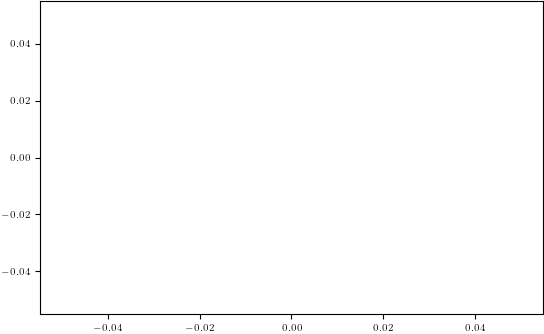

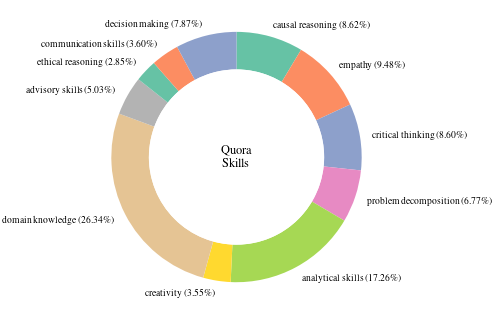

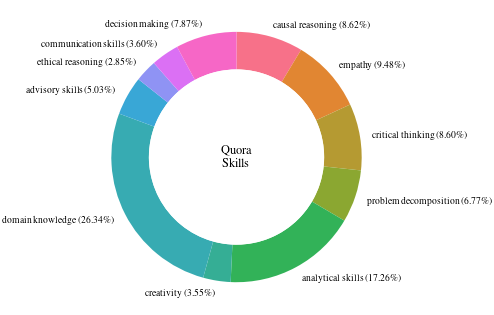

In [15]:
import seaborn as sns

np.random.seed(65)

new_idx = np.random.permutation(len(topic_info))

# idx = np.random.permutation(len(topic_info) // 2)
# idx = np.concatenate((idx, len(topic_info) // 2 + np.random.permutation(len(topic_info) // 2)))

# if len(topic_info) % 2 == 1:
#     idx = np.concatenate((idx, [len(topic_info) - 1]))


# new_idx = []

# for i in range(len(topic_info) // 2):
#     new_idx.append(idx[i])
#     new_idx.append(idx[len(topic_info) - i - 1])

# if len(topic_info) % 2 == 1:
#     new_idx = new_idx[:-1]

# if len(topic_info) % 2 == 1:
#     idx = idx[:-1]

data = topic_info["Count"].values[new_idx]

total = data.sum()

percentages = data / total * 100

labels = topic_info["Name"].values[new_idx]
labels = [f"{label} ({percentage:.2f}\%)" for label, percentage in zip(labels, percentages)]

with plt.rc_context(bundles.neurips2023()):
# Creating a doughnut plot
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, startangle=90, counterclock=False, wedgeprops=dict(width=0.3), colors=sns.color_palette("husl", len(data)))

    # Adding circle at the center to turn the pie chart into a doughnut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)

    # Adding the plot name in the middle
    plt.text(0, 0, 'Quora\nSkills', horizontalalignment='center', verticalalignment='center')


    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.plot()
    # plt.savefig("images/quora_skills.png", dpi=300)

In [33]:
def plot(dataset, dataset_type, save=True, other_topic=23):

    model_path = f"{dataset}_topic_model_{dataset_type}"
    loaded_model = BERTopic.load(model_path)
    topic_info = loaded_model.get_topic_info()

    seed = seeds[(dataset, dataset_type)]

    np.random.seed(seed)

    pairs = list(zip(topic_info["Name"].values, topic_info["Count"].values))

    other_pairs = pairs[other_topic:]

    other_total = sum([count for name, count in other_pairs])

    pairs = pairs[:other_topic] + [("other", other_total)] 

    new_idx = np.arange(len(pairs))

    small_idx = np.arange(len(pairs) // 2)
    big_idx = len(pairs) // 2 + np.arange(len(pairs) - len(pairs) // 2)

    new_idx = []

    for i in range(len(pairs) // 2):
        new_idx.append(small_idx[i])
        new_idx.append(big_idx[len(big_idx) - i - 1])

    if len(pairs) % 2 == 1:
        new_idx.append(big_idx[0])

    # if len(topic_info) % 2 == 1:
    #     idx = idx[:-1]
        
    pairs = [pairs[i] for i in new_idx]

    data = np.array([count for name, count in pairs])

    total = data.sum()

    percentages = data / total * 100

    # labels = topic_info["Name"].values[new_idx]
    labels = [name for name, count in pairs]
    labels = [f"{label} ({percentage:.2f}\%)" for label, percentage in zip(labels, percentages)]

    with plt.rc_context(bundles.neurips2023()):
    # Creating a doughnut plot
        fig, ax = plt.subplots()
        ax.pie(data, labels=labels, startangle=90, counterclock=False, wedgeprops=dict(width=0.5), colors=sns.color_palette("Set2"))

        # Adding circle at the center to turn the pie chart into a doughnut chart
        # centre_circle = plt.Circle((0,0),0.1,fc='white')
        # fig.gca().add_artist(centre_circle)

        # Adding the plot name in the middle
        plt.text(0, 0, f'{dataset_name[dataset]}\n{type_names[dataset_type]}', horizontalalignment='center', verticalalignment='center')


        # Display the plot
        plt.tight_layout()
        if save:
            plt.savefig(f"new_images/{dataset}_{dataset_type}.png", dpi=300)
        else:
            plt.show()
            # plt.plot()

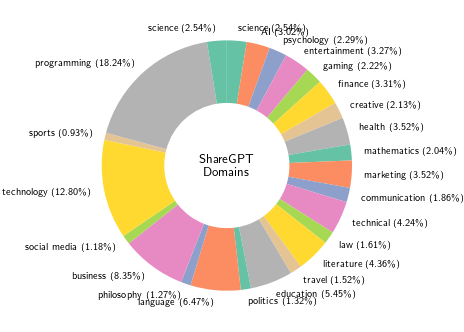

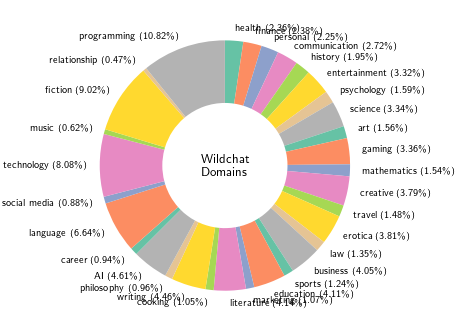

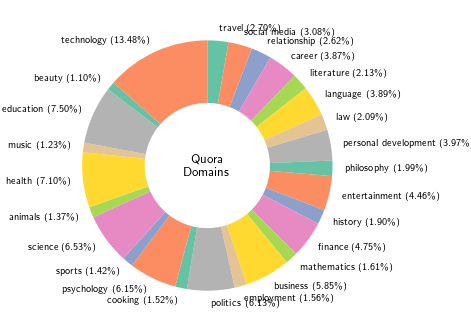

In [4]:
for dataset in datasets:
    for dataset_type in ["topics"]:
        plot(dataset, dataset_type)

In [35]:
plot("quora", "2", save=True, other_topic=10)
pass

In [36]:
import json


save = True

with open("combined_stats.json", "r") as f:
    combined_stats = json.load(f)

print(combined_stats)

np.random.seed(12)

data = list(combined_stats.items())

data = sorted(data, key=lambda x: x[1], reverse=False)

small_idx = np.arange(len(data) // 2)
big_idx = len(data) // 2 + np.arange(len(data) - len(data) // 2)

new_idx = []

for i in range(len(data) // 2):
    new_idx.append(small_idx[i])
    new_idx.append(big_idx[len(big_idx) - i - 1])

if len(data) % 2 == 1:
    new_idx.append(big_idx[0])

# if len(topic_info) % 2 == 1:
#     idx = idx[:-1]

pairs = [data[i] for i in new_idx]

data = np.array([x[1] for x in pairs])
print(len(data))

total = data.sum()

percentages = data / total * 100

labels = [x[0] for x in pairs]
print(len(labels))
print("comparison" in labels)
labels = [f"{label} ({percentage:.2f}\%)" for label, percentage in zip(labels, percentages)]

with plt.rc_context(bundles.neurips2023()):
# Creating a doughnut plot
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, startangle=90, counterclock=False, wedgeprops=dict(width=0.5), colors=sns.color_palette("Set2"))

    # Adding circle at the center to turn the pie chart into a doughnut chart
    # centre_circle = plt.Circle((0,0),0.1,fc='white')
    # fig.gca().add_artist(centre_circle)

    # Adding the plot name in the middle
    plt.text(0, 0, f'Combined\nTask types', horizontalalignment='center', verticalalignment='center')


    # Display the plot
    plt.tight_layout()
    if save:
        plt.savefig(f"new_images/combined_task_types.png", dpi=300)
    else:
        plt.show()
        # plt.plot()

{'code generation': 6.857276535244229, 'analysis': 9.074061846909089, 'information search': 6.39450762126256, 'article writing': 7.879154233331743, 'technical support': 4.037927857499002, 'creative writing': 20.743484911734527, 'concept explanation': 4.714396088437221, 'planning': 2.010150523647611, 'debugging': 3.571856590218734, 'translation': 6.0528389408370895, 'brainstorming': 1.8155838586587845, 'advice': 3.280394962019496, 'design': 2.992526356889571, 'role-playing': 3.4613662732990806, 'calculation': 1.962759755922685, 'discussion': 2.051205865629175, 'summarization': 3.450222652493175, 'comparison': 0.8576086947891925, 'evaluation': 0.9676868247388102, 'email writing': 2.0289186240173653, 'prompt engineering': 3.498585557812686, 'other': 1.0993969749315553, 'recommendation': 1.1980884496766222}
23
23
True
